In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def first_order_rk4(x: np.array, y0: float, y0_pr: float, ode_func, *ode_func_args):
    """
    rk4 solver using the equations that I
    shamelessly ripped from:
    https://www.intmath.com/differential-equations/12-runge-kutta-rk4-des.php
    
    Parameters
    ----------
    x: numpy array
        Mesh for solver
    y0: 
        Initial point for y
    y0_pr: an empty array
        Initial value for derivative
    ode_func: function
        The function that will be solved.
        The form should be:
        d^2/dx^2 y = ode_func(x, y, *ode_func_args) 
    ode_func_args : tuple (optional)
        Args for ode_func
    
    Returns
    -------
    y_pr : numpy array
        The solution to the given ODE as given by
        rk4.
    """
    n = len(x)
    dx = x[1] - x[0]  # THIS ASSUMES A LINEAR MESH !!
    half_dx = dx / 2
    # initialize return array & set initial value(s)
    y = np.empty(n)
    y[0] = y0
    y[1] = y0_pr
    
    for i in np.arange(1, n-1):
        F_1 = dx * ode_func(x[i], y[i], *ode_func_args)
        F_2 = dx * ode_func(x[i] + half_dx, y[i] + F_1 / 2, *ode_func_args)
        F_3 = dx * ode_func(x[i] + half_dx, F_2 / 2, *ode_func_args)
        F_4 = dx * ode_func(x[i+1], y[i] + F_3, *ode_func_args)
        
        y[i + 1] = ode_func(x[i], y[i], *ode_func_args) + ((1 / 6) * (F_1 + 2 * F_2 + 3 * F_3 + F_4))
    
    return y

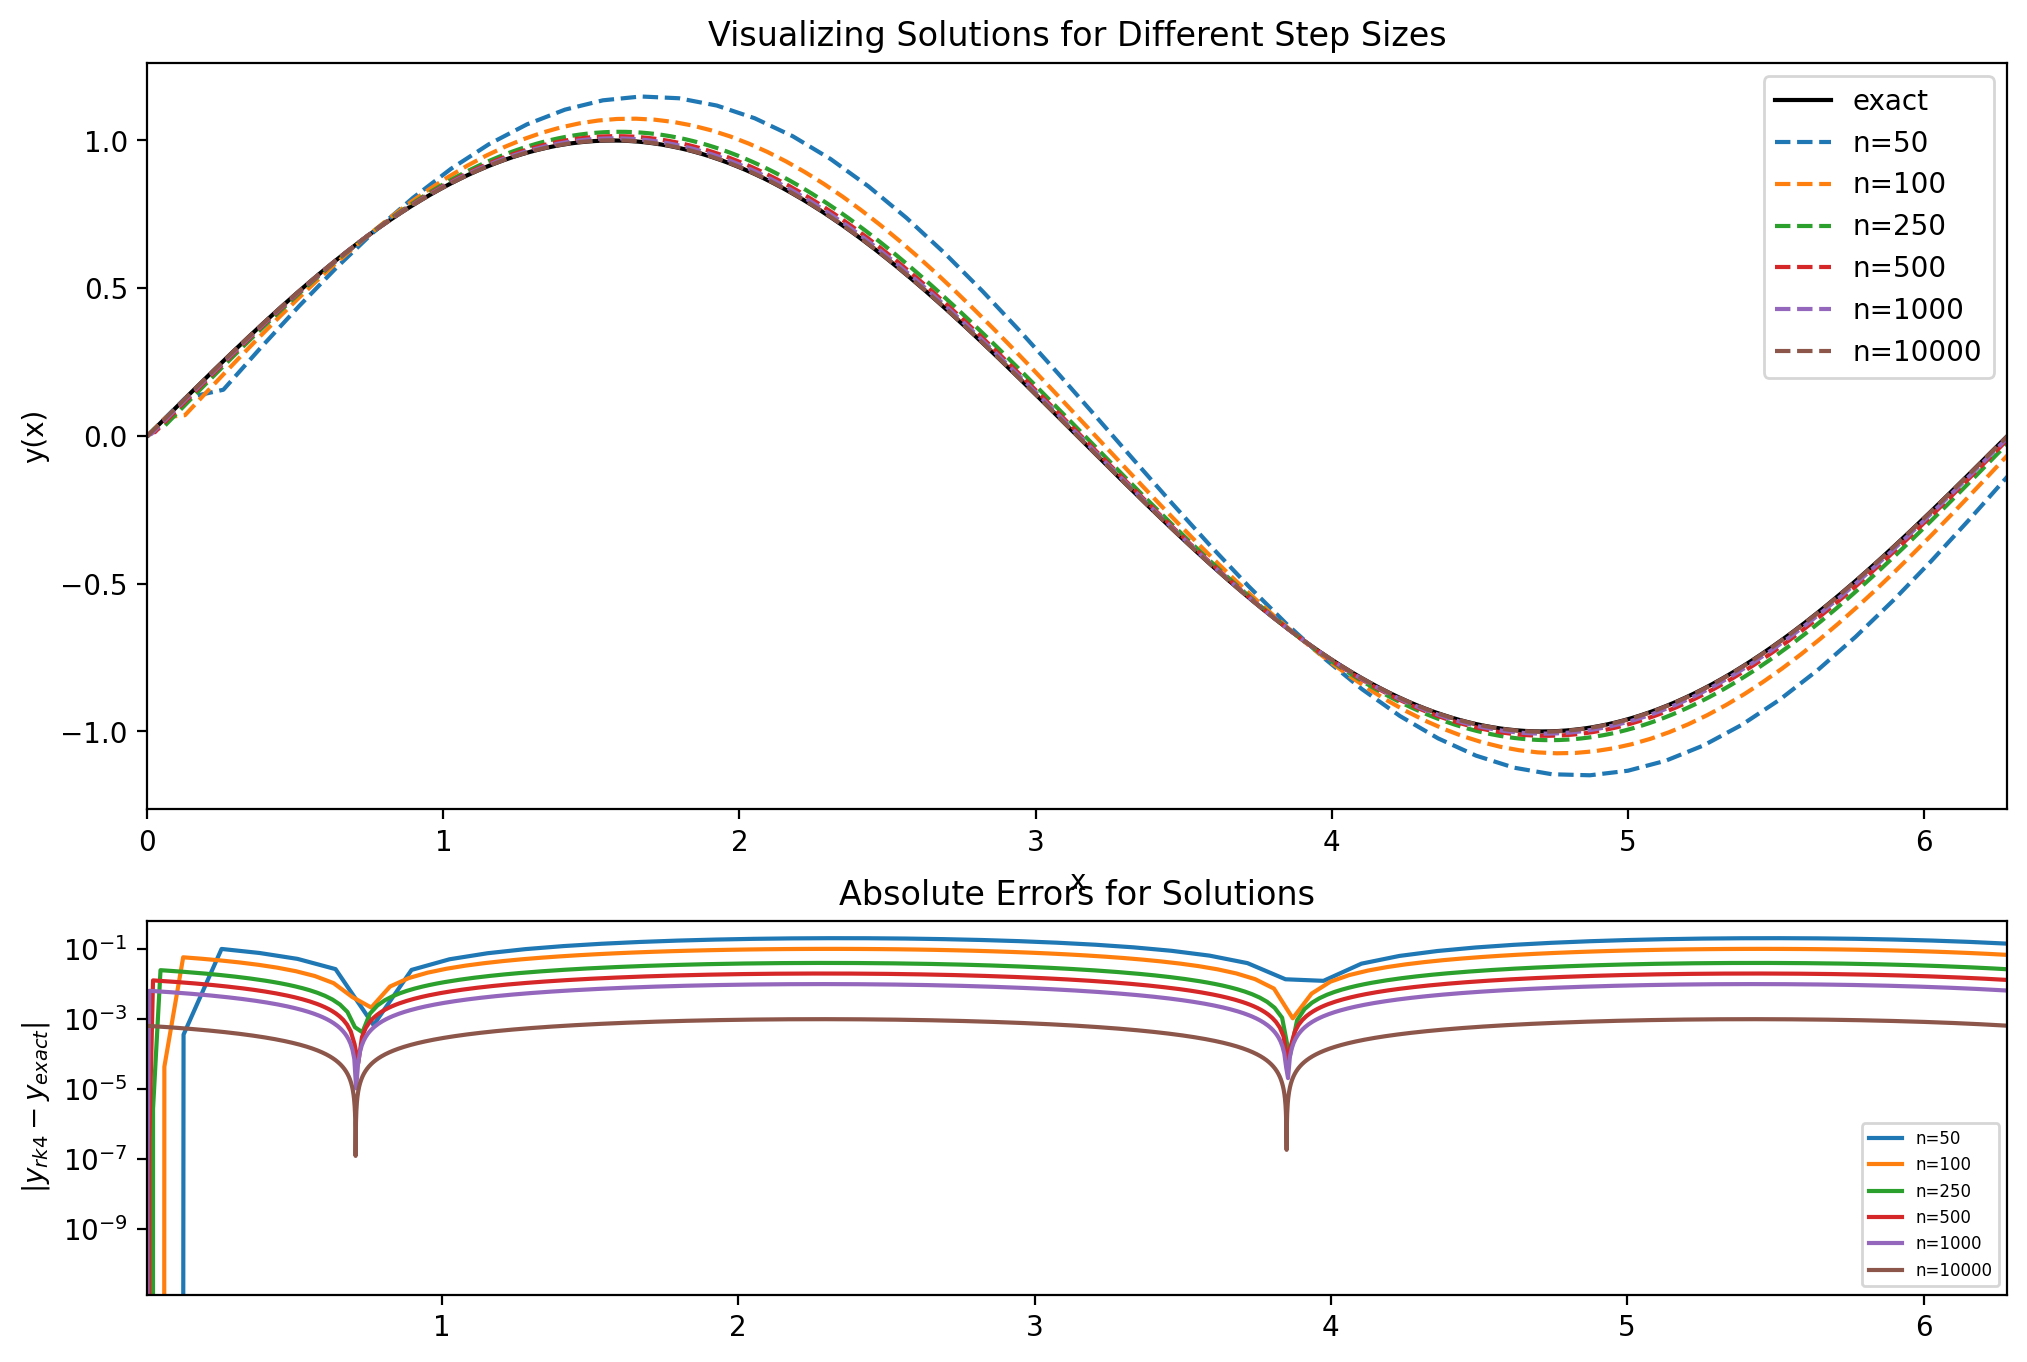

In [49]:
def test_ode_func(x, y):
    return np.sin(x)


x_1, dx_1 = np.linspace(0, 2 * np.pi, 50, retstep=True)
x_2, dx_2 = np.linspace(0, 2 * np.pi, 100, retstep=True)
x_3, dx_3 = np.linspace(0, 2 * np.pi, 250, retstep=True)
x_4, dx_4 = np.linspace(0, 2 * np.pi, 500, retstep=True)
x_5, dx_5 = np.linspace(0, 2 * np.pi, 1000, retstep=True)
x_6, dx_6 = np.linspace(0, 2 * np.pi, 10000, retstep=True)

y_1 = first_order_rk4(x_1, 0, dx_1, test_ode_func)
y_2 = first_order_rk4(x_2, 0, dx_2, test_ode_func)
y_3 = first_order_rk4(x_3, 0, dx_3, test_ode_func)
y_4 = first_order_rk4(x_4, 0, dx_4, test_ode_func)
y_5 = first_order_rk4(x_5, 0, dx_5, test_ode_func)
y_6 = first_order_rk4(x_6, 0, dx_6, test_ode_func)


fig, ax = plt.subplots(2, 1, dpi=200, figsize=(12, 8), height_ratios=[4, 2])
ax[0].set_title("Visualizing Solutions for Different Step Sizes")
ax[0].plot(x_6, np.sin(x_6), color="black", label="exact")
ax[0].plot(x_1, y_1, linestyle="--", label="n=50")
ax[0].plot(x_2, y_2, linestyle="--", label="n=100")
ax[0].plot(x_3, y_3, linestyle="--", label="n=250")
ax[0].plot(x_4, y_4, linestyle="--", label="n=500")
ax[0].plot(x_5, y_5, linestyle="--", label="n=1000")
ax[0].plot(x_6, y_6, linestyle="--", label="n=10000")
ax[0].set_xlabel("x")
ax[0].set_xlim(x[0], x[-1])
ax[0].set_ylabel("y(x)")
ax[0].legend()

ax[1].set_title("Absolute Errors for Solutions")
ax[1].plot(x_1, np.abs(y_1 - np.sin(x_1)), label="n=50")
ax[1].plot(x_2, np.abs(y_2 - np.sin(x_2)), label="n=100")
ax[1].plot(x_3, np.abs(y_3 - np.sin(x_3)), label="n=250")
ax[1].plot(x_4, np.abs(y_4 - np.sin(x_4)), label="n=500")
ax[1].plot(x_5, np.abs(y_5 - np.sin(x_5)), label="n=1000")
ax[1].plot(x_6, np.abs(y_6 - np.sin(x_6)), label="n=10000")
ax[0].set_xlabel("x")
ax[1].set_xlim(x[1], x[-1])  # skip first mesh point since that's given exactly here.
ax[1].set_ylabel("$|y_{rk4} - y_{exact}|$")
ax[1].set_yscale("log")
ax[1].legend(fontsize=6)

plt.show()

In [50]:
import timeit

print("time for 100 point solution")
%timeit first_order_rk4(x_2, 0, dx_2, test_ode_func)
print("time for 10_000 point solution")
%timeit first_order_rk4(x_6, 0, dx_6, test_ode_func)

time for 100 point solution
299 µs ± 3.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
time for 10_000 point solution
30.7 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
